# Bee or Wasp Classification

### 6310401165 วิศรุต หอมแก่นจันทร์

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.image as implt
import seaborn as sns
import cv2 as cv
import random

import PIL
from PIL import Image

import tkinter as tk
from tkinter.filedialog import askopenfilename
from IPython.display import display, HTML, Image

from tensorflow.keras.preprocessing import image

## Clean Data

In [2]:
path = 'datasets'
label = os.path.join(path, 'labels.csv')
data = pd.read_csv(label)

In [3]:
data.label.unique()

array(['bee', 'wasp', 'insect', 'other'], dtype=object)

In [4]:
data.label.value_counts()

label
wasp      4943
bee       3183
insect    2439
other      856
Name: count, dtype: int64

In [5]:
data = data[((data['label']=='bee') | (data['label']=='wasp')) & (data['photo_quality']==1)] 
output_classes = ['bee','wasp']
data.label.value_counts()

label
bee     2469
wasp    2127
Name: count, dtype: int64

In [6]:
data.label.unique()

array(['bee', 'wasp'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4596 entries, 0 to 5309
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   4596 non-null   int64 
 1   path                 4596 non-null   object
 2   is_bee               4596 non-null   int64 
 3   is_wasp              4596 non-null   int64 
 4   is_otherinsect       4596 non-null   int64 
 5   is_other             4596 non-null   int64 
 6   photo_quality        4596 non-null   int64 
 7   is_validation        4596 non-null   int64 
 8   is_final_validation  4596 non-null   int64 
 9   label                4596 non-null   object
dtypes: int64(8), object(2)
memory usage: 395.0+ KB


## Train / Test Split

In [8]:
dataset = "datasets"

train_wasp = sorted(os.listdir(dataset +'/wasp1'))
train_bee =  sorted(os.listdir(dataset +'/bee1'))


test_wasp = sorted(os.listdir(dataset +'/wasp2'))
test_bee =  sorted(os.listdir(dataset +'/bee2'))

list=["train_wasp","train_bee","test_wasp","test_bee"]

wasp1=0
wasp2=0
bee1=0
bee2=0

for i in train_wasp:
    wasp1=wasp1+1
    
for i in train_bee:
    bee1=bee1+1
    
for i in test_wasp:
    wasp2=wasp2+1
    
for i in test_bee:
    bee2=bee2+1

print("train_wasp :",wasp1)
print("test_wasp :",wasp2)
print("train_bee :",bee1)
print("test_bee :",bee2)

train_wasp : 2127
test_wasp : 2816
train_bee : 2469
test_bee : 714


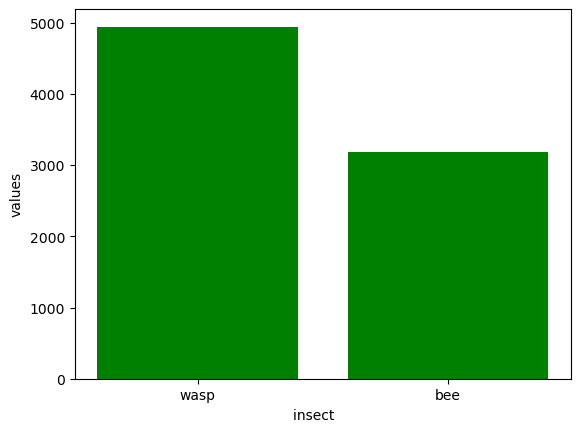

In [9]:
count_wasp =wasp1+wasp2
count_bee=bee1+bee2

list_count=[count_wasp,count_bee]

list_count_veriable =["wasp","bee"]

list=["train_wasp","train_bee","test_wasp","test_bee"]

fig = plt.figure()
plt.bar(list_count_veriable,list_count,color="green")
plt.bar(list_count_veriable,list_count,color="green")
plt.xlabel("insect    ")
plt.ylabel("values")
plt.show()

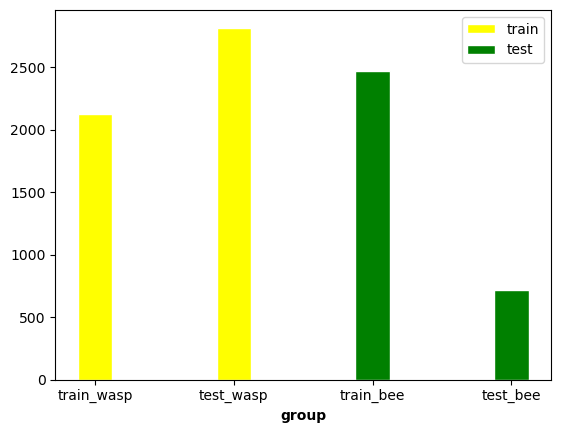

In [10]:
barWidth = 0.25
 
# set height of bar

bars1 = [wasp1,wasp2]
bars2 = [ bee1,bee2]
 

list1=["train_wasp","test_wasp"]
list2=["train_bee","test_bee"]
 
# Make the plot
plt.bar(list1, bars1, color='yellow', width=barWidth, edgecolor='white', label='train')
plt.bar(list2, bars2, color='green', width=barWidth, edgecolor='white', label='test')

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')

 
# Create legend & Show graphic
plt.legend()
plt.show()

In [11]:
list_img_wasp=[]
x_list_wasp=[]
list_img_bee=[]
x_list_bee=[]

for x in train_wasp:
    x_list_wasp.append(x)
for i in range(1,2127):
    list_img_wasp.append(implt.imread(dataset +'/wasp1/'+x_list_wasp[i]))

for y in train_bee:
    x_list_bee.append(y)
for a in range(1,2469):
    list_img_bee.append(implt.imread(dataset +'/bee1/'+x_list_bee[a]))

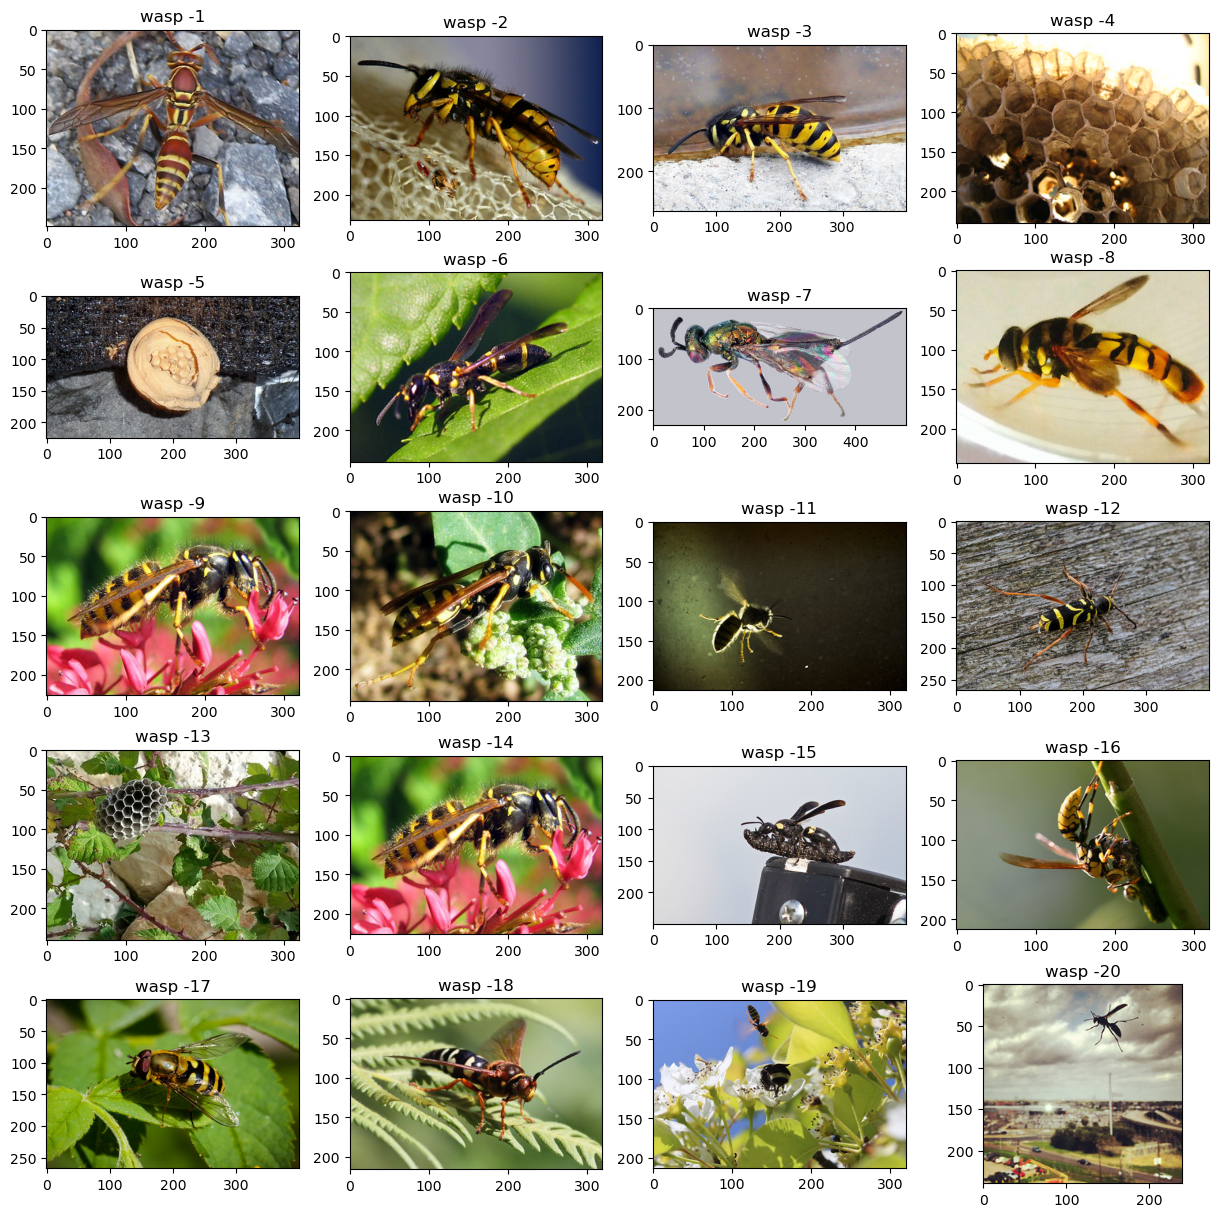

In [12]:
#random wasp images
w=10
h=10
fig=plt.figure(figsize=(15,15))
columns = 4
rows = 5
for i in range(1,21):
    img = np.random.randint(500, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(list_img_wasp[random.randint(1,500)])#random values
    converted_num = str(i) 
    plt.title("wasp -"+converted_num)
    i=int(i)
    
plt.show()

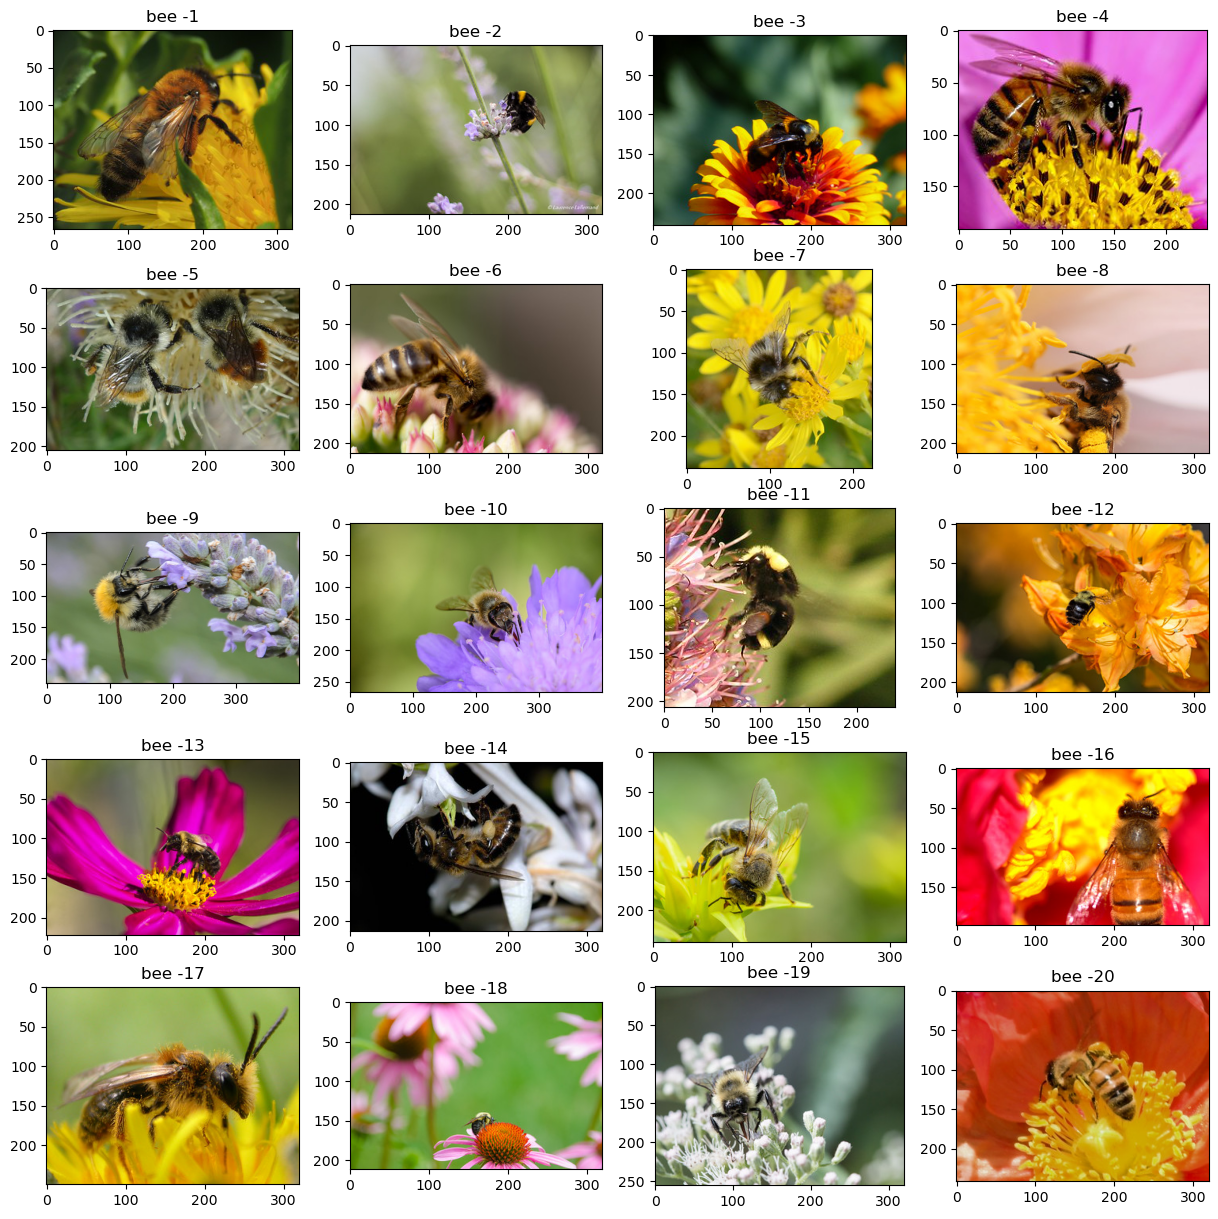

In [13]:
#random bee images

w=10
h=10
fig=plt.figure(figsize=(15,15))
columns = 4
rows = 5

for i in range(1,21):
    
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(list_img_bee[random.randint(1,500)])
    converted_num = str(i) 
    plt.title("bee -"+converted_num)
    i=int(i)
    
plt.show()

## Processing Dataset

In [14]:
img_size = 50
wasp_insect = []
bee_insect = [] 
label = []

for i in train_wasp:
    if os.path.isfile(dataset +'/wasp1/'+ i):
        insect = PIL.Image.open(dataset +'/wasp1/'+ i).convert('L') #converting grey scale            
        insect = insect.resize((img_size,img_size), PIL.Image.Resampling.LANCZOS) #resizing to 50,50
        insect = np.asarray(insect)/255.0 #normalizing images
        wasp_insect.append(insect)  
        label.append(1)
           
        
for i in train_bee:
    if os.path.isfile(dataset+'/bee1/'+ i):
        insect = PIL.Image.open(dataset+'/bee1/'+ i).convert('L')
        insect = insect.resize((img_size,img_size), PIL.Image.Resampling.LANCZOS)
        insect = np.asarray(insect)/255.0 #normalizing images
        bee_insect.append(insect)  
        label.append(0)

        
x_train = np.concatenate((wasp_insect,bee_insect),axis=0) # training dataset
x_train_label = np.asarray(label)# label array containing 0 and 1
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)

print("wasp_insect:",np.shape(wasp_insect) , "bee_insect:",np.shape(bee_insect))
print("train_dataset:",np.shape(x_train), "train_values:",np.shape(x_train_label))

wasp_insect: (2127, 50, 50) bee_insect: (2469, 50, 50)
train_dataset: (4596, 50, 50) train_values: (4596, 1)


In [15]:
img_size = 50
wasp_insect = []
bee_insect = [] 
label = []


for i in test_wasp:
        if os.path.isfile(dataset +'/wasp2/'+ i):
            insect = PIL.Image.open(dataset +'/wasp2/'+ i).convert('L')            
            insect = insect.resize((img_size,img_size), PIL.Image.Resampling.LANCZOS)
            insect = np.asarray(insect)/255.0
            wasp_insect.append(insect)  
            label.append(1)     

for i in test_bee:
        if os.path.isfile(dataset+'/bee2/'+ i):
            faces = PIL.Image.open(dataset+'/bee2/'+ i).convert('L')
            faces = faces.resize((img_size,img_size), PIL.Image.Resampling.LANCZOS)
            faces = np.asarray(faces)/255.0            
            bee_insect.append(faces)
            label.append(0)                       

x_test = np.concatenate((wasp_insect,bee_insect),axis=0) # test dataset
x_test_label = np.asarray(label) # corresponding labels
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)

print("wasp_insect:",np.shape(wasp_insect), "bee_insect:",np.shape(bee_insect))
print("test_dataset:",np.shape(x_test), "test_values:",np.shape(x_test_label))

wasp_insect: (2816, 50, 50) bee_insect: (714, 50, 50)
test_dataset: (3530, 50, 50) test_values: (3530, 1)


In [16]:
x = np.concatenate((x_train,x_test),axis=0) #train_data
y = np.concatenate((x_train_label,x_test_label),axis=0) #test data
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]) #flatten 3D image array to 2D
print("images:",np.shape(x), "labels:",np.shape(y))

images: (8126, 2500) labels: (8126, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("train number:",number_of_train, "test number:",number_of_test)

train number: 6500 test number: 1626


In [18]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2500, 6500)
x test:  (2500, 1626)
y train:  (1, 6500)
y test:  (1, 1626)


## Logistic Regression

### Initializing parameters 

In [19]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

### Forward Propagation

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Optimization Algorithm with Gradient Descent

In [21]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b    
    y_head = sigmoid(z)    
    loss = -(1-y_train)*np.log(1-y_head)-y_train*np.log(y_head)        
    cost = (np.sum(loss))/x_train.shape[1]  
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                   
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [22]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [23]:
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    y_prediction = np.where(z <= 0.5, 0, 1)
    return y_prediction

Cost after iteration 0: 4.257751
Cost after iteration 10: 3.530008
Cost after iteration 20: 2.804560
Cost after iteration 30: 2.087735
Cost after iteration 40: 1.408219
Cost after iteration 50: 0.882543
Cost after iteration 60: 0.678557
Cost after iteration 70: 0.651580
Cost after iteration 80: 0.649284
Cost after iteration 90: 0.648656


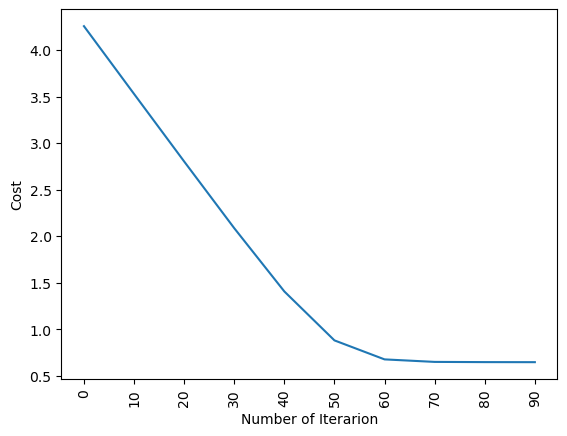

train accuracy: % 60.83
test accuracy: % 60.82


In [24]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # 2500
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    train_acc_lr = round((100 - np.mean(np.abs(y_prediction_train - y_train)) * 100),2)
    test_acc_lr = round((100 - np.mean(np.abs(y_prediction_test - y_test)) * 100),2)
    # Print train/test Errors
    print("train accuracy: %", train_acc_lr)
    print("test accuracy: %", test_acc_lr)
    return train_acc_lr, test_acc_lr,w,b
    

train_acc_lr, test_acc_lr,w,b = logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.001, num_iterations = 100)

model = {"weight": w, "bias": b}

# User Input

In [25]:
filetypes = (
        ('Image files', '*.jpg'),
        ('Image files', '*.jpeg'),
        ('Image files', '*.png'),
)

root = tk.Tk()
root.attributes('-topmost',True)
root.iconify()
    
img_path = askopenfilename(title='Choose your shark picture',
                            filetypes=filetypes,
                            parent=root)

root.destroy()

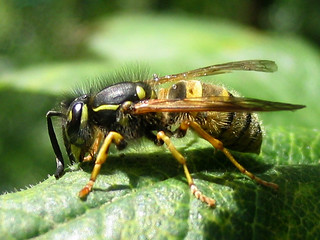

In [26]:
display(Image(img_path))

In [27]:
def preprocess_image(image_path):
    img = PIL.Image.open(image_path).convert("L")
    img = img.resize((50, 50),PIL.Image.Resampling.LANCZOS)
    img_array = np.array(img).flatten()
    img_array = img_array / 255.0
    return img_array.reshape(1, -1)

In [28]:
def predict_image_class(image_path, model):
    # Load model parameters
    w = model["weight"]
    b = model["bias"]
    # Preprocess the input image
    preprocessed_image = preprocess_image(image_path)
    # Make predictions using the logistic regression model
    predicted_class = predict(w, b, preprocessed_image.T)
    return predicted_class

In [29]:
predicted_class = np.argmax(predict_image_class(img_path, model))
print('This is {}.'.format(output_classes[predicted_class]))

This is bee.
